In [1]:
# import pandas, matplotlib and numpy
import pandas as pd
import numpy as np

In [2]:
# Read 50 startups data
df_startup = pd.read_csv('../../data-csv/csv-files/50_Startups.csv')
df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Read all the columns except the 'Profit' column to X
X = df_startup.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [4]:
# Read the 'Profit' column to y
y = df_startup.iloc[:, 4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [5]:
# "State" is a categorical variable, lets use One Hot encoding 
# One hot encoding is a process by which categorical variables are converted into a form that could be 
# provided to ML algorithms to do a better job in prediction.
# Drop one column to avoid "DUMMY VARIABLE TRAP"
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [6]:
# Drops the 'State' column from X
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
# Conacat "one-hot-encoded" values of State column to X (axis=1 means add column)
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [45]:
# Fitting Linear Regression to the dataset
# so that we can use it for comparision later
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X[['R&D Spend']])
X_poly_df = pd.DataFrame(X_poly)
X_poly_df

,0,1,2
0,1.0,165349.20,2.734036e+10
1,1.0,162597.70,2.643801e+10
2,1.0,153441.51,2.354430e+10
3,1.0,144372.41,2.084339e+10
4,1.0,142107.34,2.019450e+10
5,1.0,131876.90,1.739152e+10
6,1.0,134615.46,1.812132e+10
7,1.0,130298.13,1.697760e+10
8,1.0,120542.52,1.453050e+10
9,1.0,123334.88,1.521149e+10


In [60]:
# Fit a polynominal regression
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

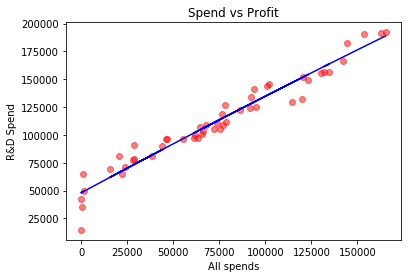

In [61]:
# Visualising the Training set results
import matplotlib.pyplot as plt

# Actual data
#plt.scatter(X_test, y_test, color = 'red', cmap='viridis', alpha=0.5)
plt.scatter(X['R&D Spend'], y, color = 'red', cmap='viridis', alpha=0.5)
#plt.scatter(X['Administration'], y, color = 'green', cmap='viridis', alpha=0.5)
#plt.scatter(X['Marketing Spend'], y, color = 'grey', cmap='viridis', alpha=0.5)

#Predicted data
plt.plot(X['R&D Spend'], poly_lin_reg.predict(X_poly), color = 'blue')
#plt.plot(X['R&D Spend'], lin_reg.predict(X), color = 'green')

plt.title('Spend vs Profit')
plt.xlabel('All spends')
plt.ylabel('R&D Spend')
plt.show()